In [23]:
%load_ext autoreload
%autoreload 2

%config InlineBackend.figure_format = 'retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import scanpy as sc 
import sys 
sys.path.append('../../src')

from spaceoracle.prophets import Prophet

2025-01-06 13:34:09.515671: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [17]:
adata_train = sc.read_h5ad(
    '/ix/djishnu/shared/djishnu_kor11/training_data/survey_kidney.h5ad')

save_dir = '/ix/djishnu/shared/djishnu_kor11/results/survey_kidney'

pythia = Prophet(
    adata=adata_train,
    models_dir='/ix/djishnu/shared/djishnu_kor11/models_kidney',
    annot='cluster_cat',
    annot_labels='ct2'
)

In [18]:
pythia.compute_betas()

100%|██████████| 2285/2285 [01:57<00:00, 19.46it/s]


In [10]:
[x for x in pythia.adata.var_names if 'Bcl' in x]

['Bcl2',
 'Bcl2l11',
 'Bcl2l13',
 'Bcl2l14',
 'Bcl2a1d',
 'Bcl11a',
 'Bcl11b',
 'Bcl6',
 'Bclaf3']

In [6]:
[x for x in pythia.beta_dict.data['Bcl2'].columns if 'Flt3' in x]

['beta_Flt3l$Flt3']

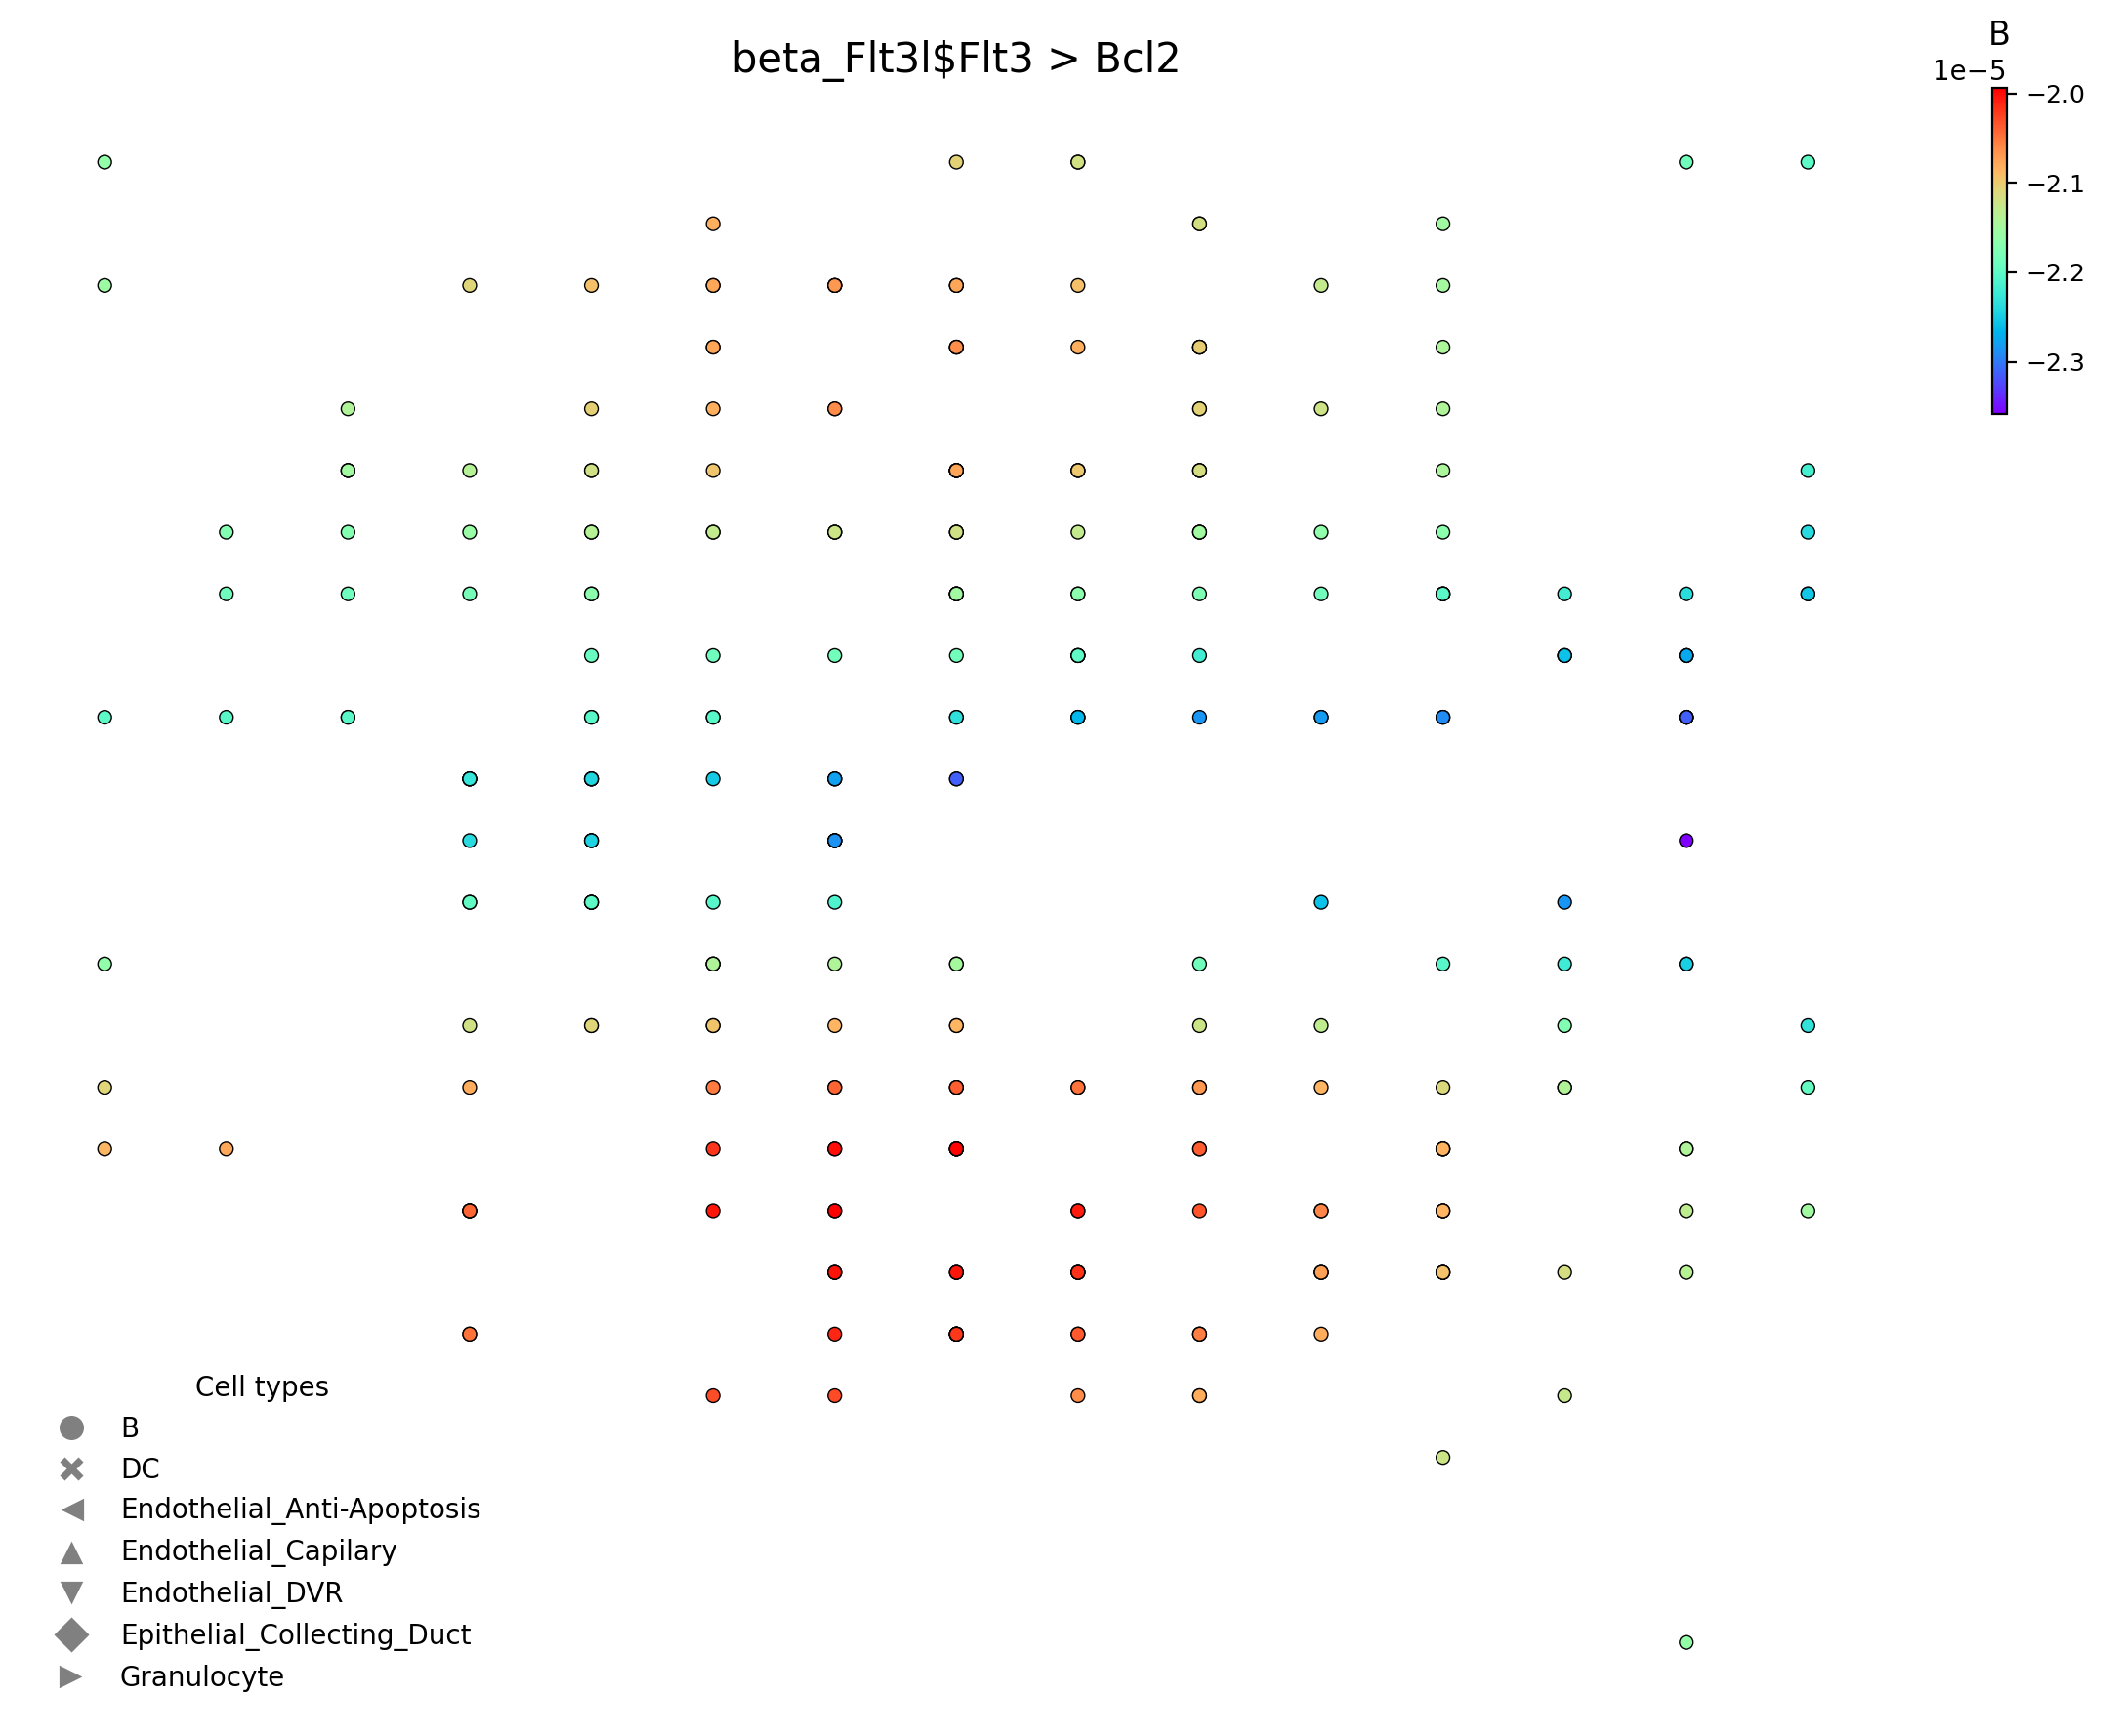

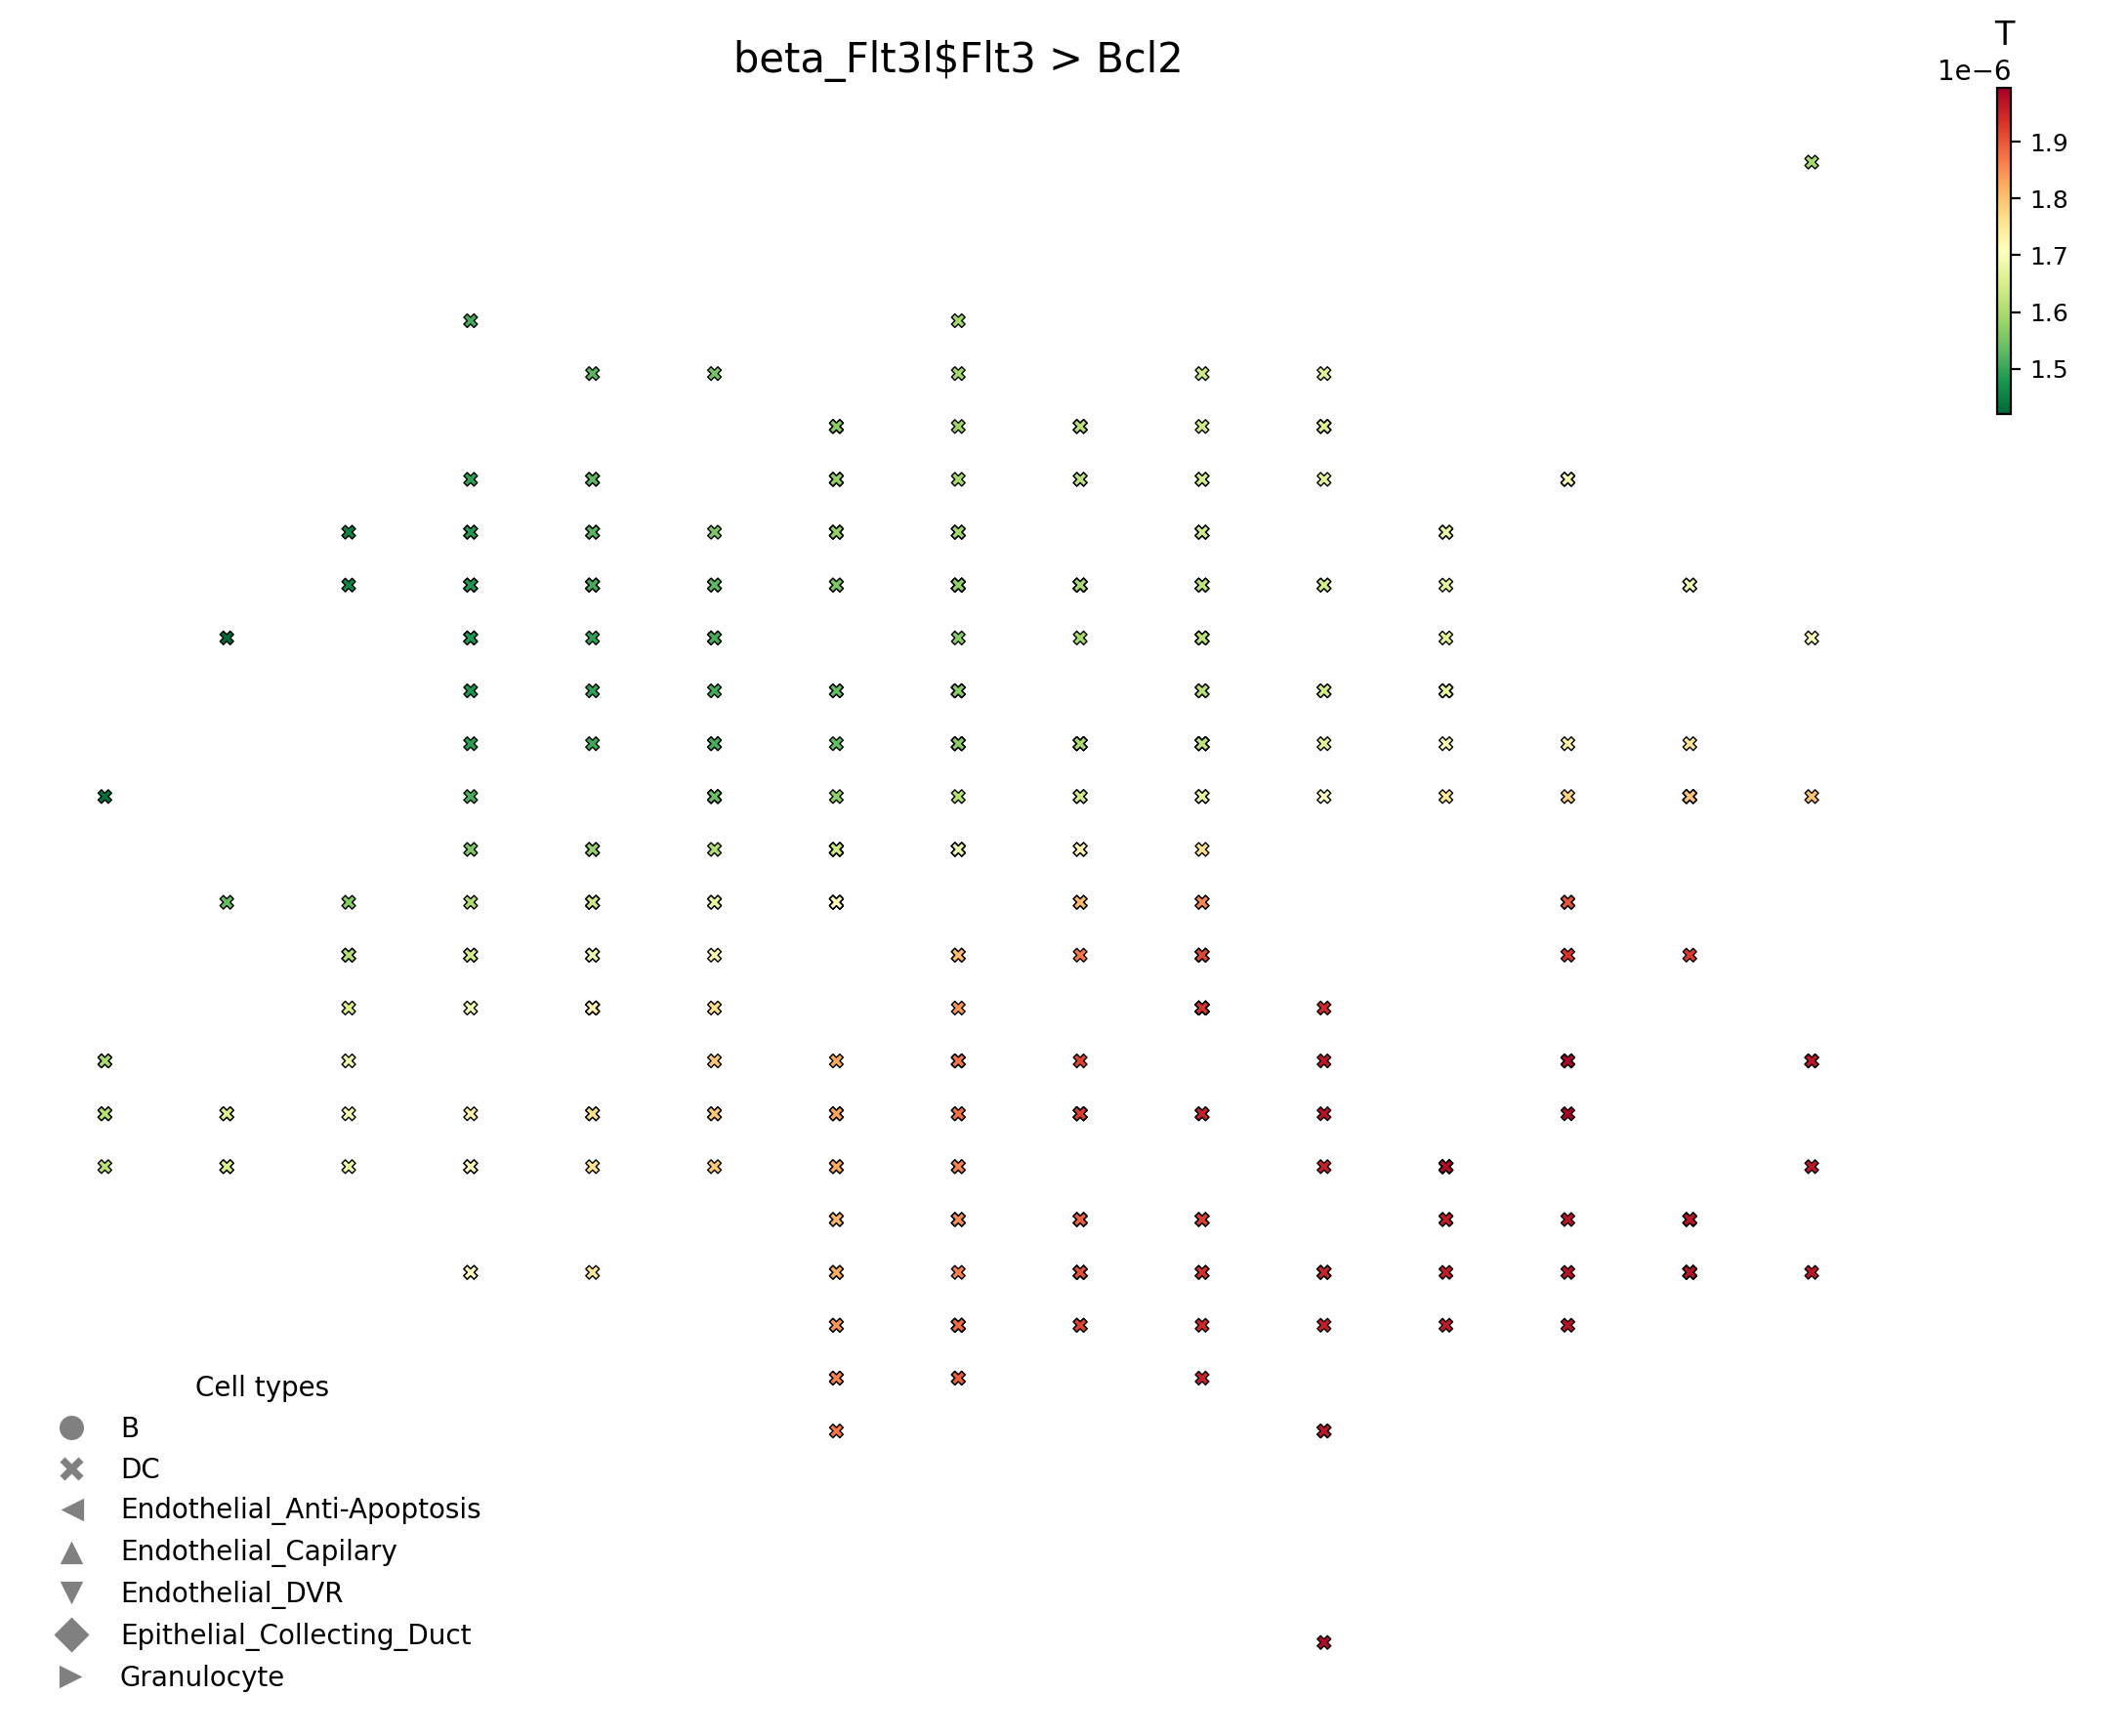

In [7]:
pythia.plot_beta_map(
    regulator='Flt3l$Flt3', 
    target_gene='Bcl2',
    save_dir=f'{save_dir}/beta_maps/',
    clusters=[0]
)
pythia.plot_beta_map(
    regulator='Flt3l$Flt3', 
    target_gene='Bcl2',
    save_dir=f'{save_dir}/beta_maps/',
    clusters=[8]
)

In [19]:
goi = 'Flt3'
goi in pythia.adata.var_names

True

Ligand interactions: 100%|██████████| 2285/2285 [01:28<00:00, 25.83it/s]


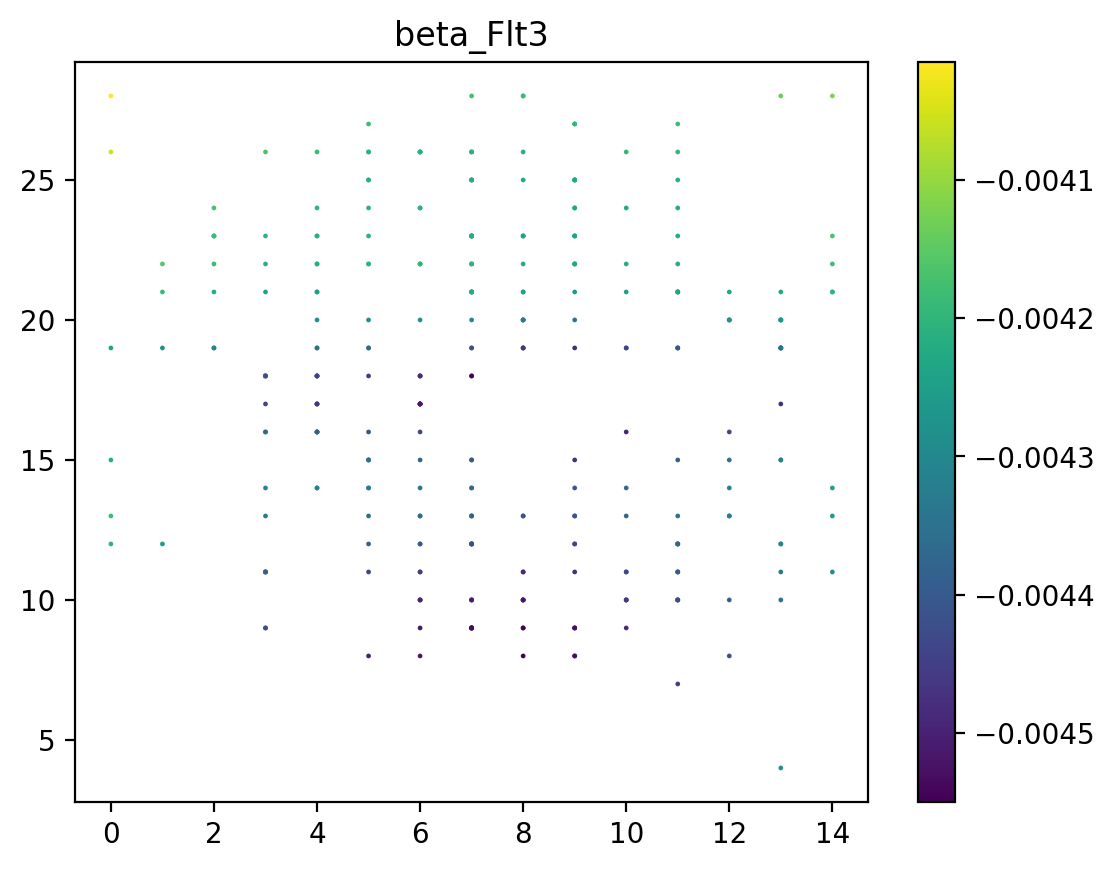

In [18]:
pythia.plot_betas_goi(goi=goi, use_simulated=False, clusters=['B'])

In [20]:
pythia.perturb(target=goi, n_propagation=3, gene_expr=0)

Running simulation 3/3: 100%|██████████| 6959/6959 [06:48<00:00, 17.05it/s]


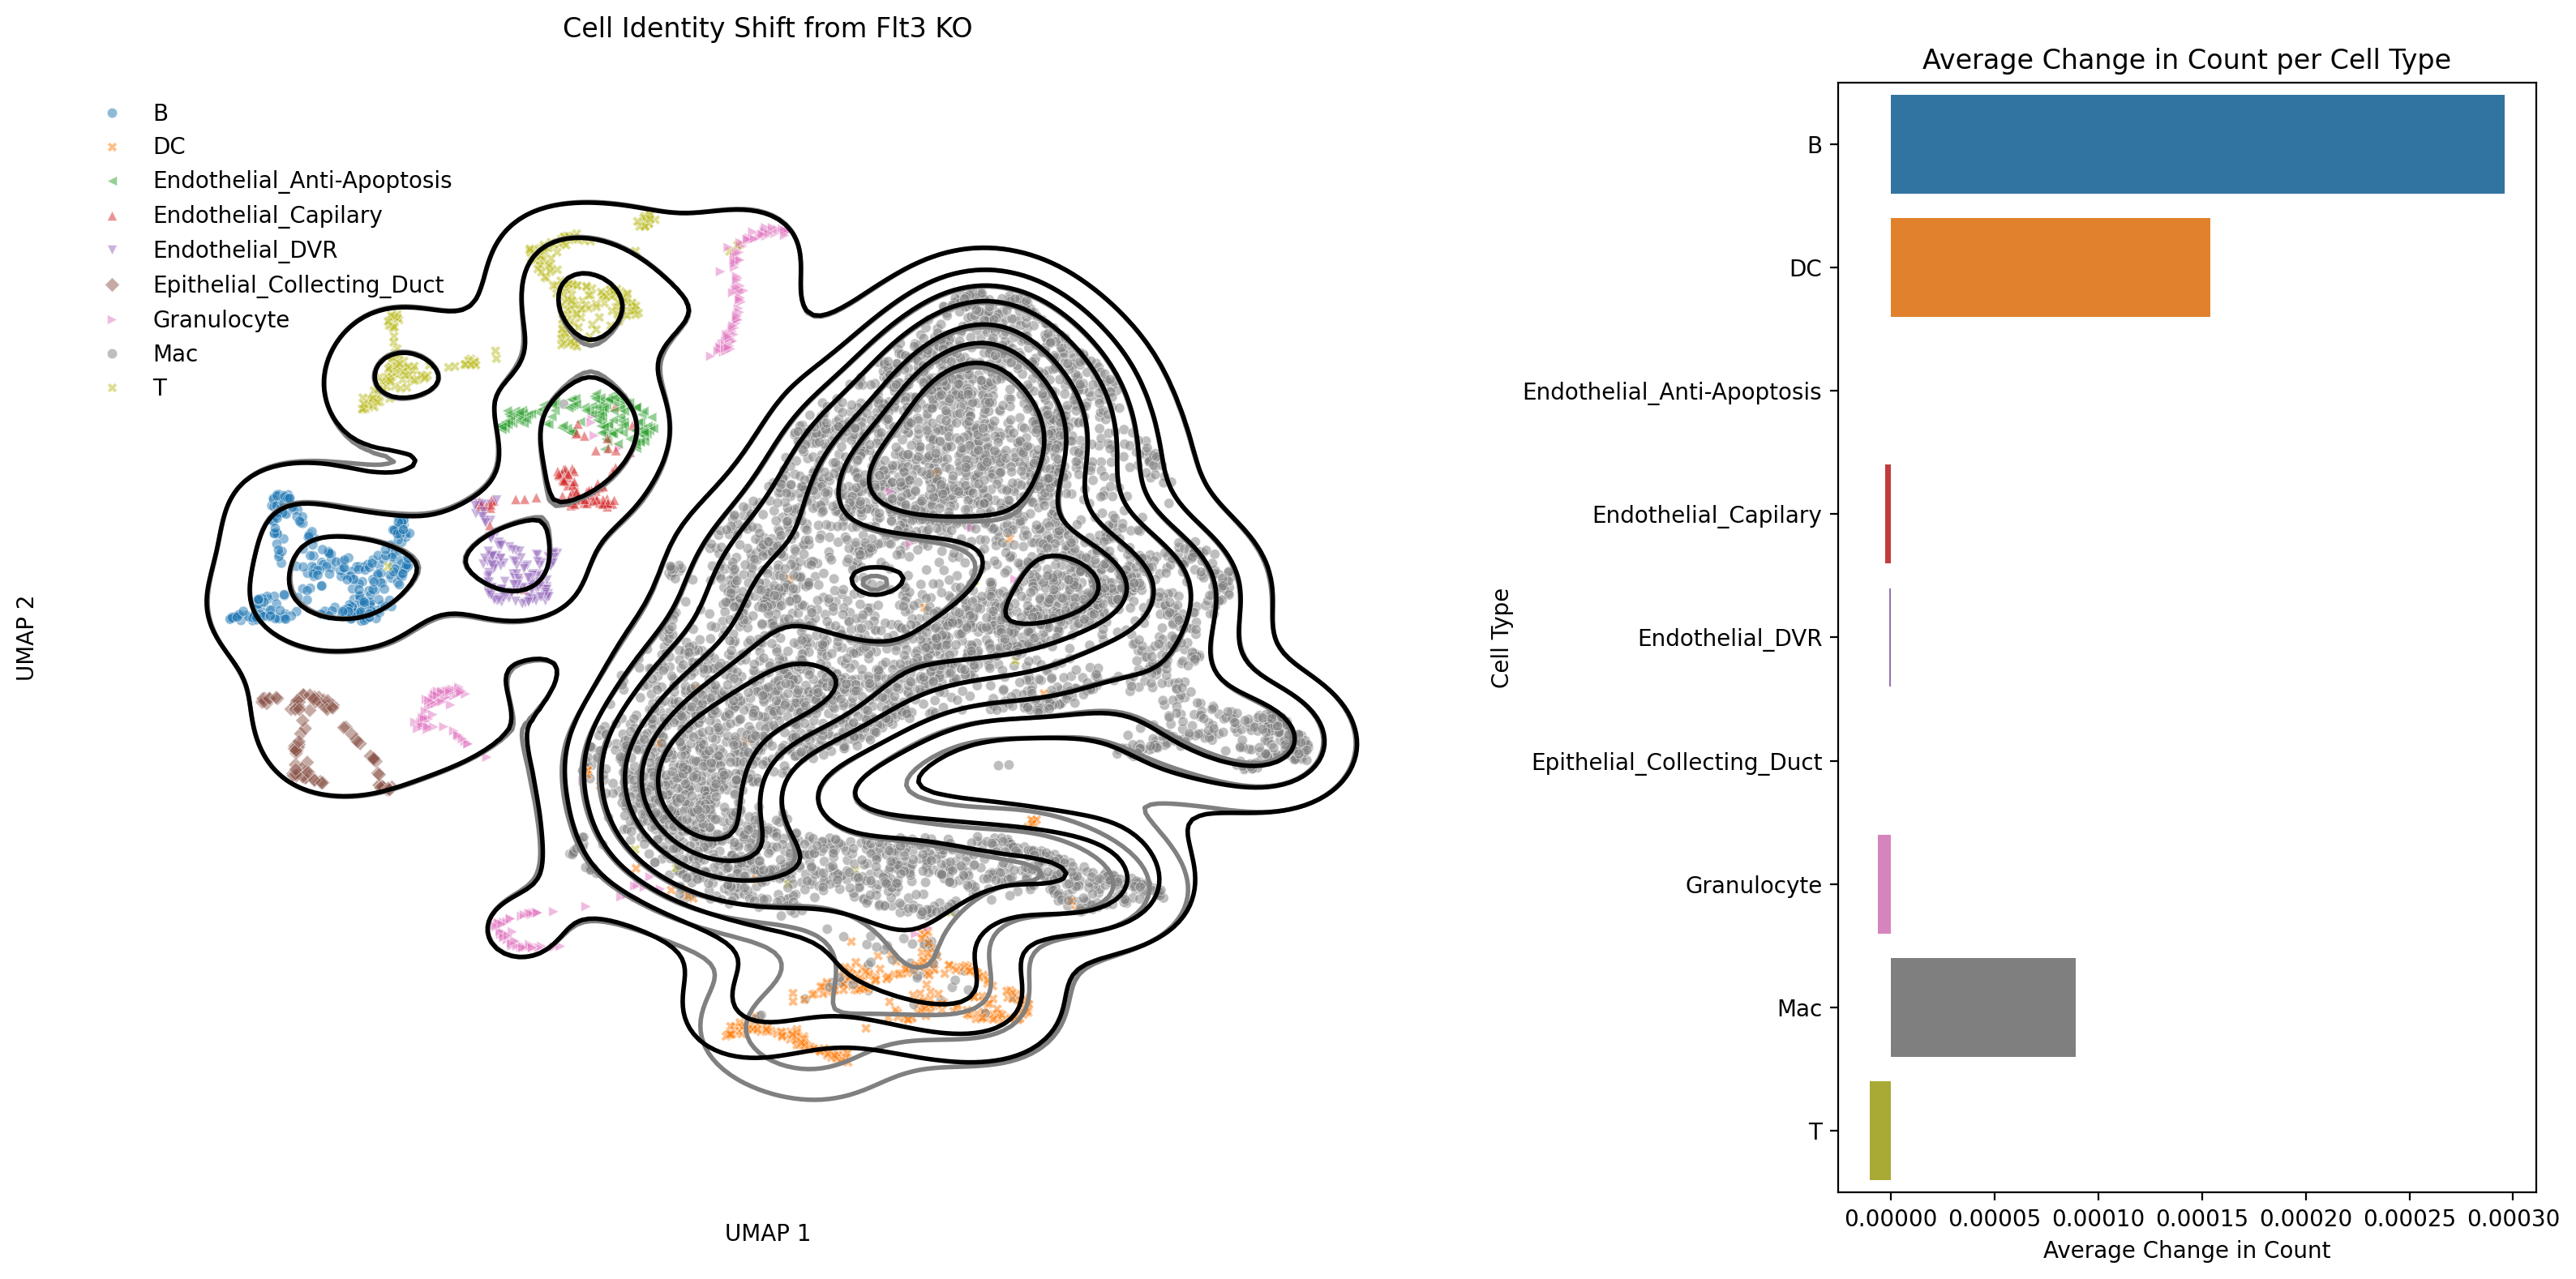

In [35]:
pythia.plot_contour_shift(savepath=f'{save_dir}/{goi}_contour_shift.png')

Ligand interactions: 100%|██████████| 2285/2285 [02:20<00:00, 16.31it/s]


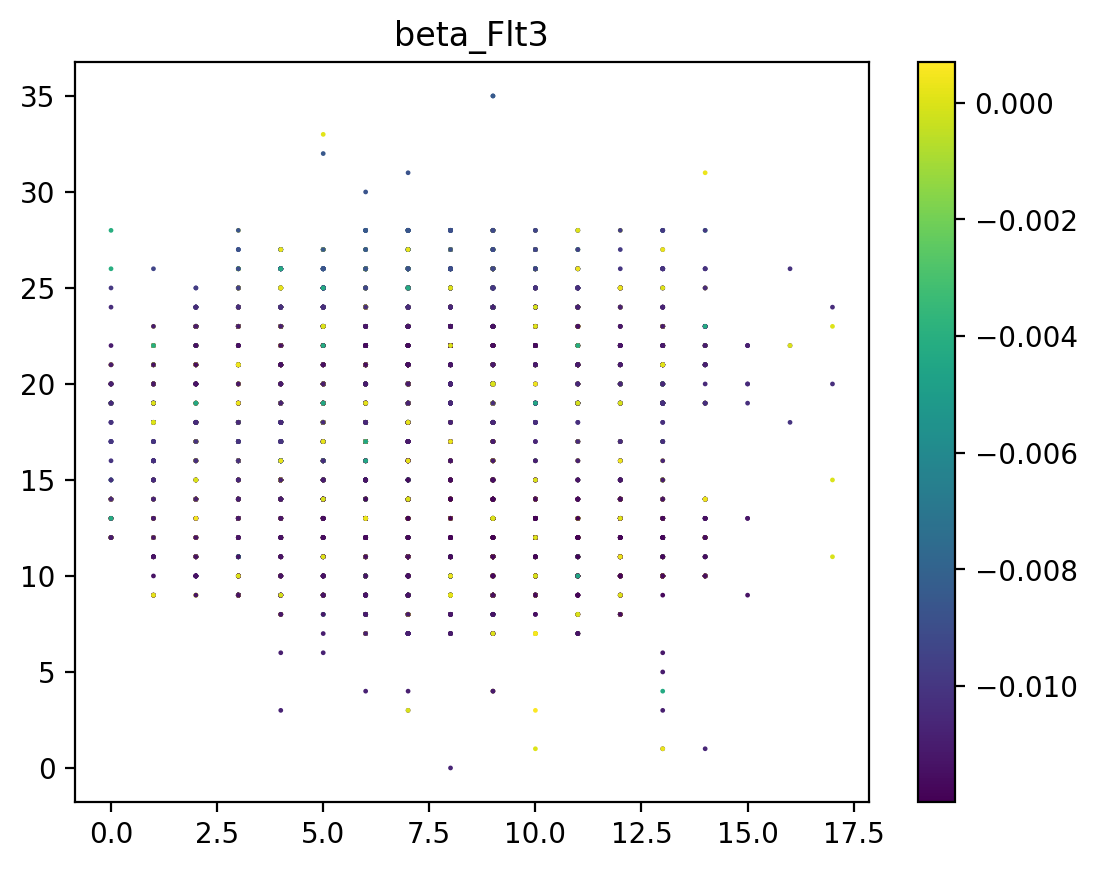

B 0.5048336020175482
DC 0.3162462144920717
Endothelial_Anti-Apoptosis 0.4927448238984903
Endothelial_Capilary 0.4222716958565711
Endothelial_DVR 0.44395905738617353
Epithelial_Collecting_Duct 0.7422563693306761
Granulocyte 0.4376533104632049
Mac 0.3108968544197752
T 0.6587561252951838


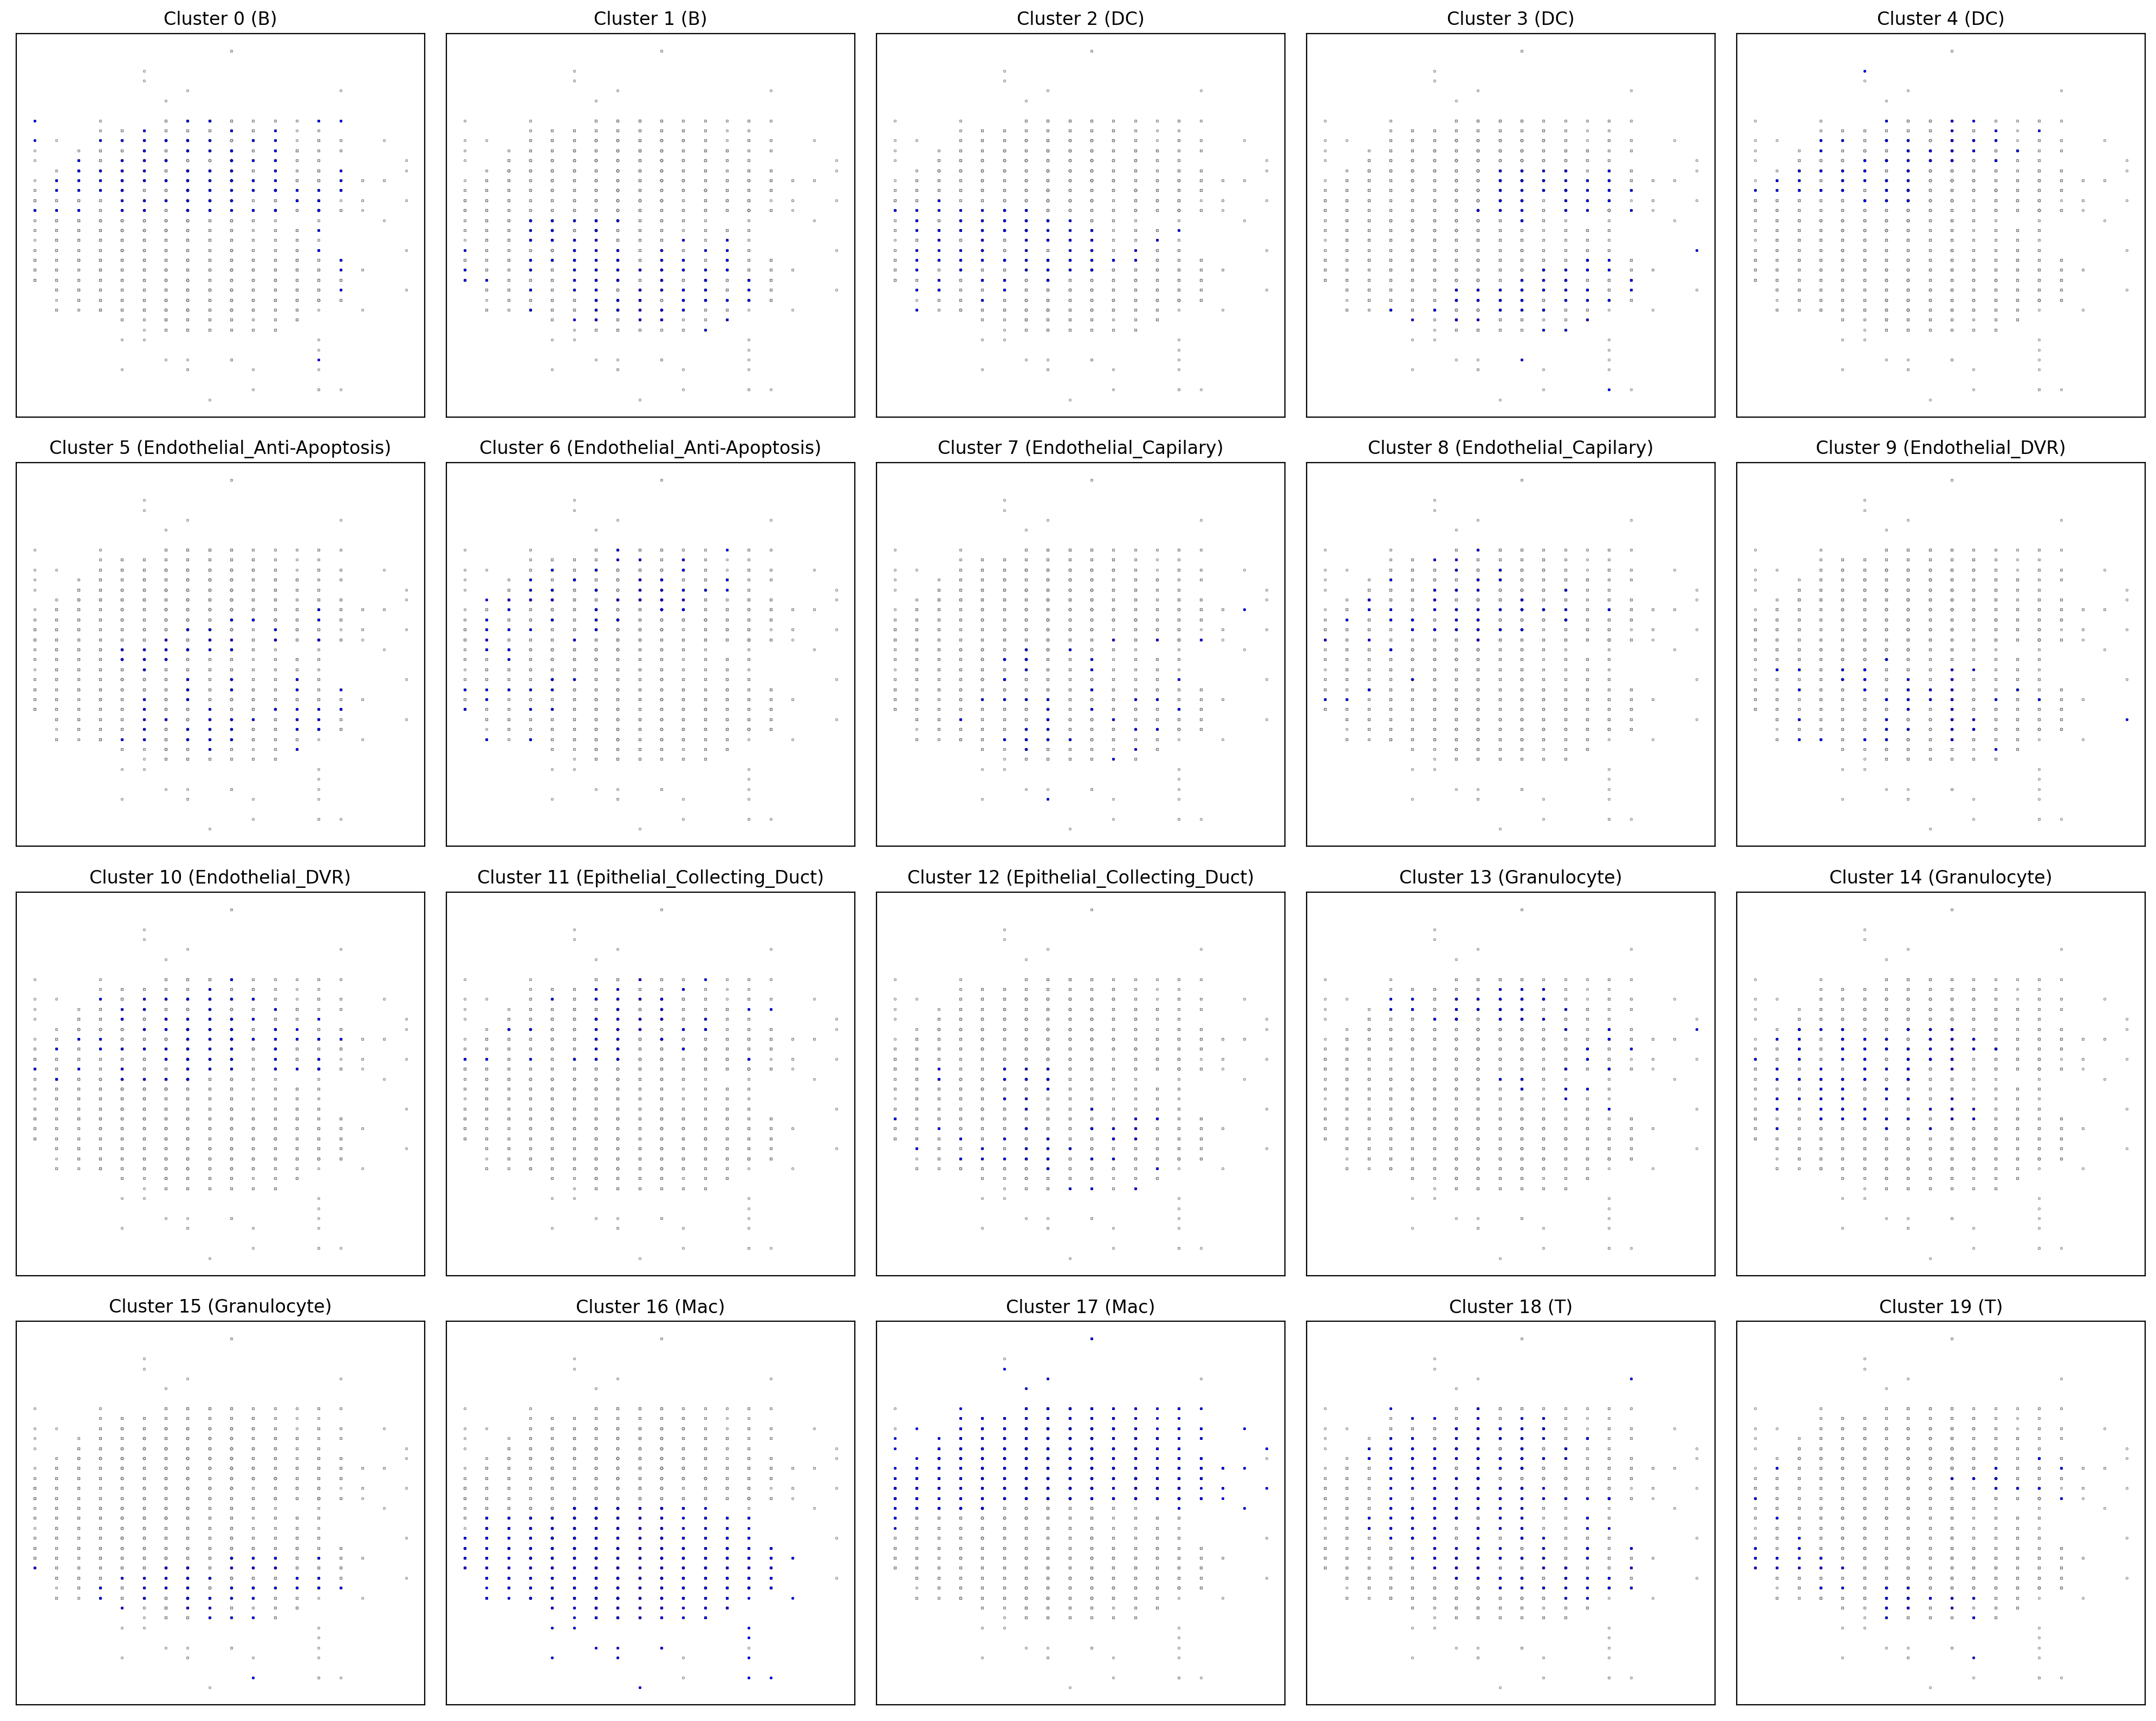

In [37]:
pythia.plot_beta_neighborhoods()
# pythia.plot_beta_umap(use_modulators=False)

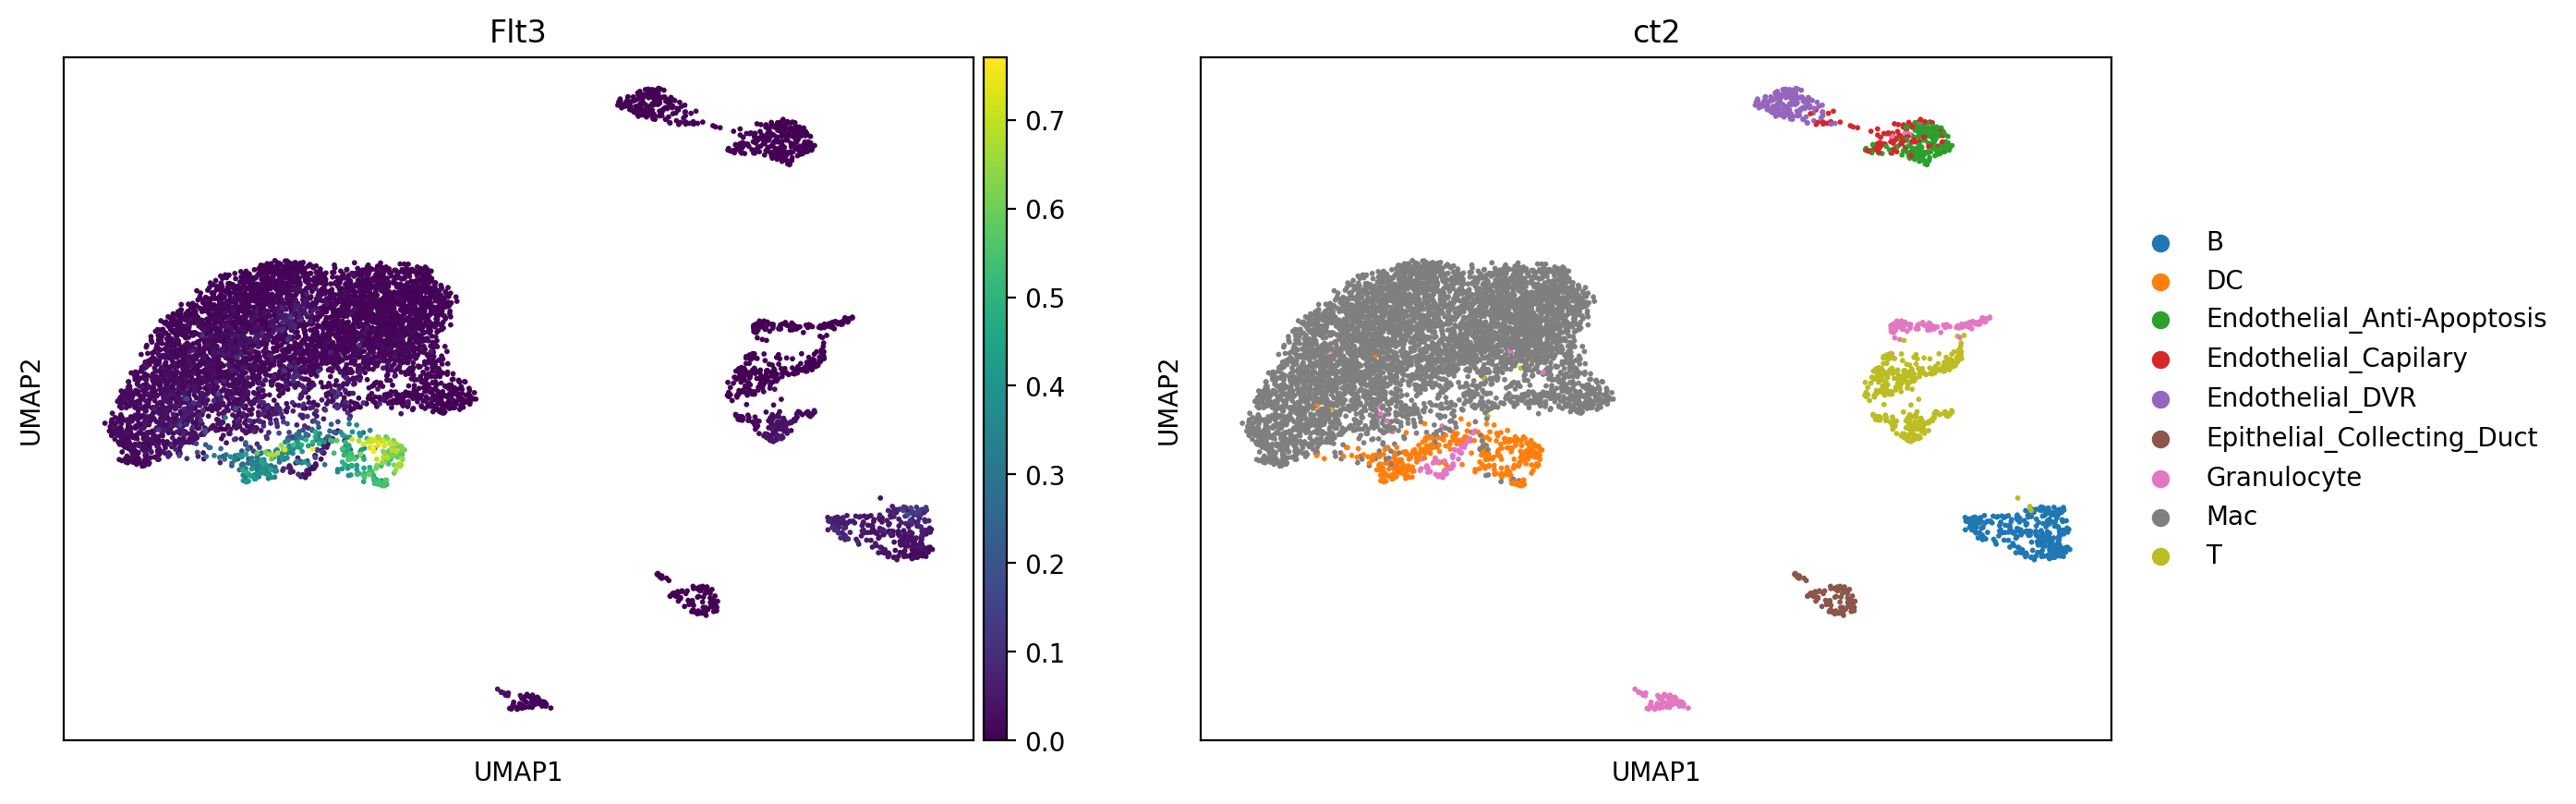

In [38]:
pythia.show_cluster_gex(embedding='UMAP')

3.6020072220420682


Computing vectors: 100%|██████████| 10710/10710 [00:00<00:00, 25586.37it/s]


3.6020072220420682


Computing vectors: 100%|██████████| 10710/10710 [00:00<00:00, 25721.01it/s]


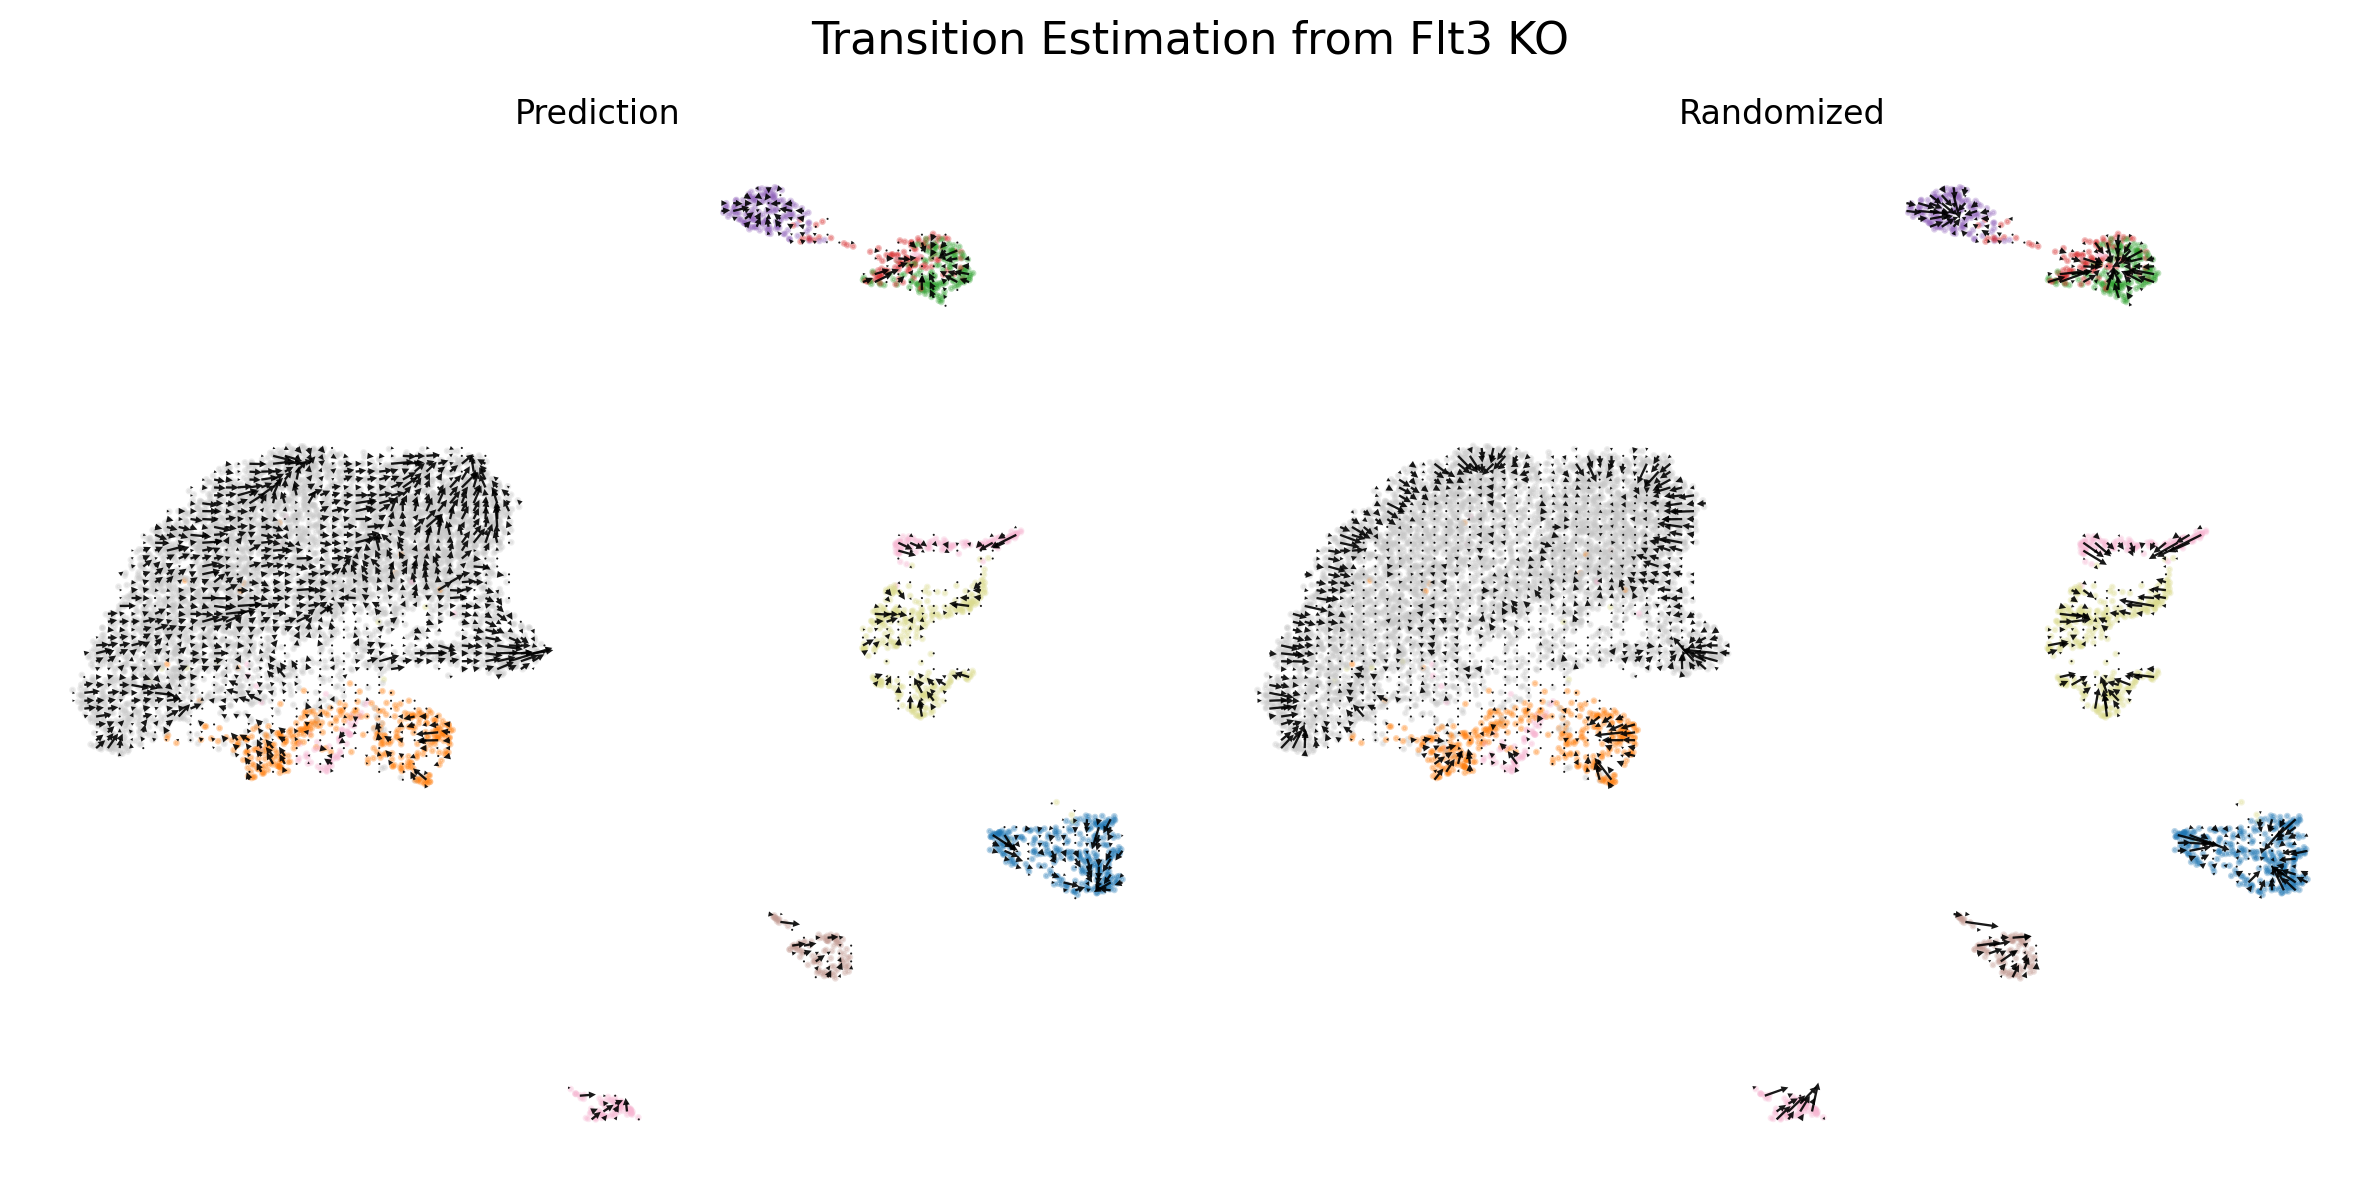

In [39]:
pythia.show_transitions(
    vector_scale=1, 
    layout_embedding=pythia.adata.obsm['X_umap'],
    nn_embedding=pythia.adata.obsm['X_umap'],
    grid_scale=3,
    savepath=f'{save_dir}/transitions_{goi}.png'
)

In [ ]:
# might not work yet

pythia.compute_gsea_scores(savepath=f'{save_dir}/gsea_scores.png')
pythia.compute_gsea_scores(use_simulated=True, savepath=f'{save_dir}/gsea_scores_{goi}.png')

In [ ]:
pythia.compute_gsea_scores(savepath=f'{save_dir}/gsea_scores_umap.png', show_spatial=False)
pythia.compute_gsea_scores(use_simulated=True, savepath=f'{save_dir}/gsea_scores_{goi}_spatial.png', show_spatial=False)

In [ ]:
gsea_scores = {}

for mod_name, mod_dict in pythia.gsea_modules.items():
    gene_list = mod_dict['geneSymbols']
    gene_list = [g for g in gene_list if g in pythia.adata.var_names]
    score_name = f'{mod_name}'

    sc.tl.score_genes(pythia.adata, gene_list, score_name=score_name, use_raw=False)

    gsea_scores[mod_name] = pythia.adata.obs[score_name]


In [ ]:
for mod_name in pythia.gsea_scores['observed'].index:
    if pythia.goi in pythia.gsea_modules[mod_name]['geneSymbols']:
        print(mod_name)

In [ ]:
pythia.plot_betas_goi(save_dir=save_dir, use_simulated=True)